# TASK-1: Prediction using Supervised ML

### AUTHOR: Subham Surana

### PROBLEM STATEMENT: Predict the percentage of a student based on the number of study hours

### PREDICTION: What will be the predicted score if a student studies for 9.25 hours/day

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

## Reading the given dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Analysis

In [3]:
# To check number of rows and columns in our dataset
df.shape 

(25, 2)

In [4]:
# To check if there is any null value in any column
df.isnull().sum()  

Hours     0
Scores    0
dtype: int64

In [5]:
# To check if there are any duplicate values in our dataset to avoid data leakage
df.duplicated().any()  

False

In [6]:
# To see summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


## Data Visualization

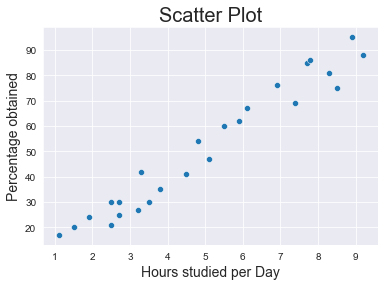

In [7]:
# Plotting a 2D graph showing the distribution of scores and study hours
sns.set_style('darkgrid')
sns.scatterplot(y=df['Scores'], x=df['Hours'])
plt.xlabel('Hours studied per Day',size=14)
plt.ylabel('Percentage obtained',size=14)
plt.title('Scatter Plot',size=20)
plt.show()

> From the above plot we can say that there seems a linear relationship between the two variables.

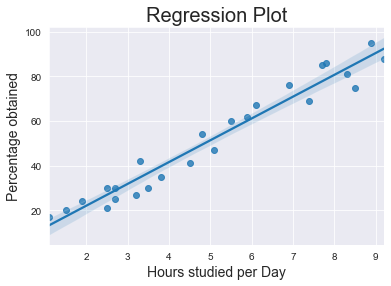

In [8]:
sns.set_style('darkgrid')
sns.regplot(y=df['Scores'], x=df['Hours'])
plt.xlabel('Hours studied per Day',size=14)
plt.ylabel('Percentage obtained',size=14)
plt.title('Regression Plot', size=20)
plt.show()

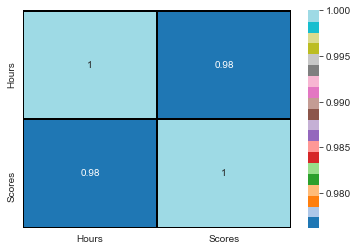

In [9]:
# Calculating & Plotting the Pearson's correlation coefficient
sns.heatmap(df.corr(), annot=True, cmap='tab20', linewidths=1.5, linecolor='k')
plt.show()

> From above heatmap we can easily see that there is a positive linear relation between the "Number of hours studied per day" and the "Percentage of Score".

## Preparing and Training our Model

In [10]:
# Splitting data into training and testing data
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# Training Linear Regression Model on training data
regression = LinearRegression()
regression.fit(X_train,y_train)
print("The Model has been trained!")

The Model has been trained!


## Making Predictions

In [12]:
y_pred = regression.predict(X_test)
prediction = pd.DataFrame({'Hours':[i[0]for i in X_test],'Expected Marks':y_pred})
prediction

,Hours,Expected Marks
0,1.9,20.668845
1,5.9,60.070495
2,7.4,74.846114
3,8.3,83.711486
4,7.8,78.786279


In [13]:
# Comparing Actual vs Predicted Percentage
compared_marks = pd.DataFrame({'Actual Percentage':y_test,'Expected Percentage':y_pred})
compared_marks

,Actual Percentage,Expected Percentage
0,24,20.668845
1,62,60.070495
2,69,74.846114
3,81,83.711486
4,86,78.786279


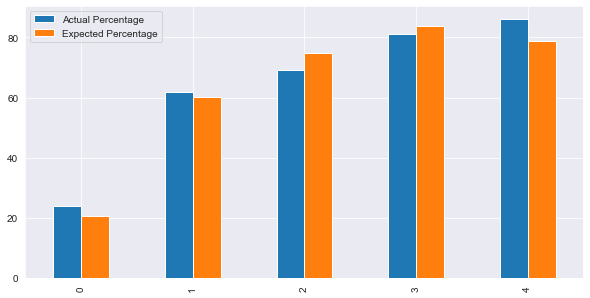

In [14]:
# Visualizing the comparison of actual and predicted data using a bar graph
compared_marks.plot(kind='bar', figsize= (10,5))
plt.show()

## Evaluating our Model

In [15]:
# calculate MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.206396148555715
Mean Squared Error: 21.67731149804463
Root Mean Squared Error: 4.655889979160229


## New Prediction 

In [16]:
Hours = [9.25]
value = regression.predict([Hours])
print("The predicted Score, if a student studies for 9.25 hours/day is {}".format(round(value[0],2)))

The predicted Score, if a student studies for 9.25 hours/day is 93.07
